In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv('emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [4]:
# Convert labels to numerical values
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
df['label'] = df['label'].map(label_mapping)

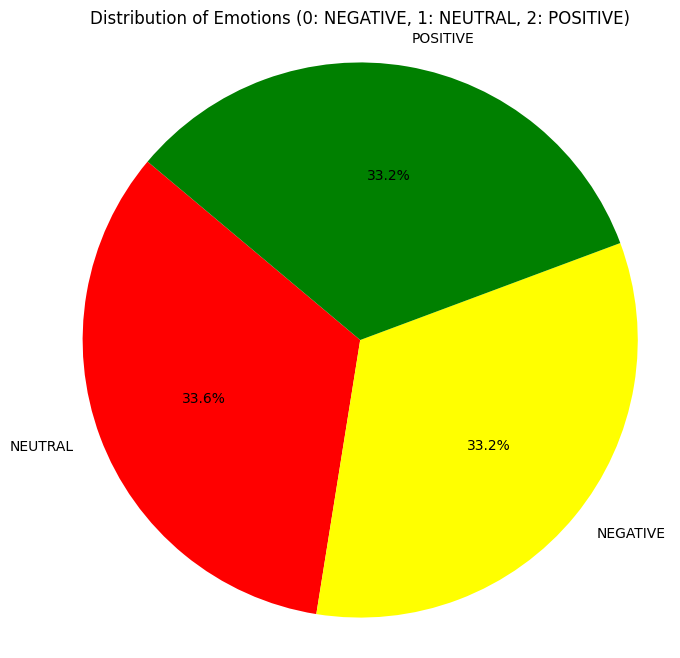

In [5]:
# Visualization using a Pie Chart

# Count the occurrences of each emotion
emotion_counts = df['label'].value_counts()

# Define emotional labels
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Map numerical labels to emotional labels
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded into a DataFrame 'df' with features and labels
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier (you can specify the number of neighbors with the 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Example with 5 neighbors

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, you can print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7611241217798594
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       143
           1       0.76      0.86      0.81       148
           2       0.68      0.50      0.58       136

    accuracy                           0.76       427
   macro avg       0.75      0.76      0.75       427
weighted avg       0.75      0.76      0.75       427



c:\Users\DHIKSHA NANDHINI S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\DHIKSHA NANDHINI S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

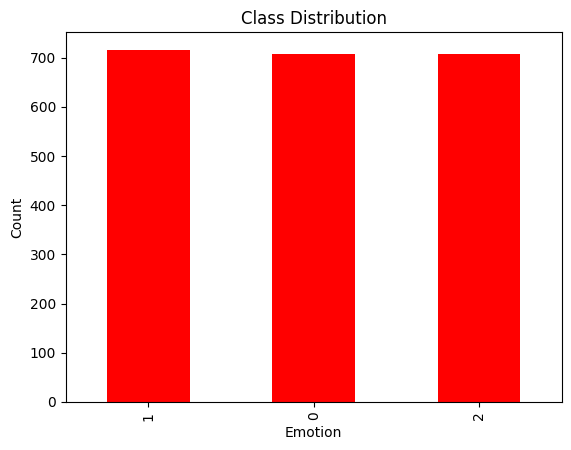

In [7]:
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='bar', color='red')
plt.title("Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded into a DataFrame 'df' with EEG signal features and labels
X = df.iloc[:, :-1].values  # EEG signal features
y = df.iloc[:, -1].values  # Labels

# Encode the labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = keras.Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes (positive, negative, neutral)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the LSTM model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode the integer labels back to their original values
y_test = label_encoder.inverse_transform(y_test)
y_pred_classes = label_encoder.inverse_transform(y_pred_classes)

y_pred_lstm = model.predict(X_test)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_classes_lstm)

# Evaluate the LSTM model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Optionally, you can print a classification report for more detailed metrics
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)


Epoch 1/50
43/43 [==============================] - 15s 101ms/step - loss: 0.4395 - accuracy: 0.8688 - val_loss: 0.4598 - val_accuracy: 0.9355
Epoch 2/50
43/43 [==============================] - 2s 41ms/step - loss: 0.2085 - accuracy: 0.9326 - val_loss: 0.3179 - val_accuracy: 0.9501
Epoch 3/50
43/43 [==============================] - 2s 40ms/step - loss: 0.1541 - accuracy: 0.9494 - val_loss: 0.2654 - val_accuracy: 0.9384
Epoch 4/50
43/43 [==============================] - 2s 41ms/step - loss: 0.1304 - accuracy: 0.9509 - val_loss: 0.2091 - val_accuracy: 0.9413
Epoch 5/50
43/43 [==============================] - 2s 41ms/step - loss: 0.1024 - accuracy: 0.9604 - val_loss: 0.1748 - val_accuracy: 0.9413
Epoch 6/50
43/43 [==============================] - 2s 41ms/step - loss: 0.0778 - accuracy: 0.9736 - val_loss: 0.1239 - val_accuracy: 0.9531
Epoch 7/50
43/43 [==============================] - 2s 41ms/step - loss: 0.0663 - accuracy: 0.9780 - val_loss: 0.1747 - val_accuracy: 0.9384
Epoch 8/50


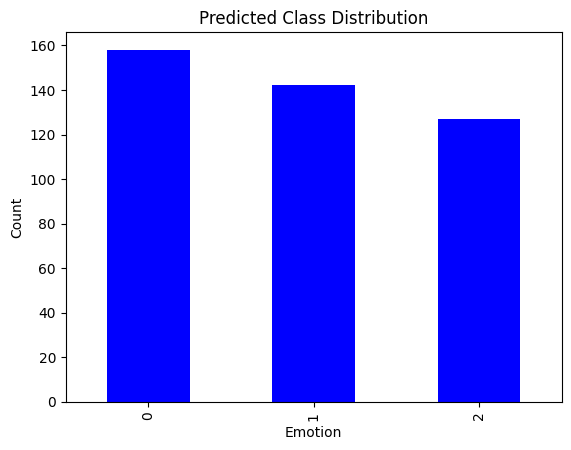

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your predicted class labels in a variable 'y_pred_classes'
# Create a Pandas Series to count the occurrences of each class
predicted_class_distribution = pd.Series(y_pred_classes).value_counts()

# Create a bar plot to visualize the distribution
predicted_class_distribution.plot(kind='bar', color='blue')
plt.title("Predicted Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


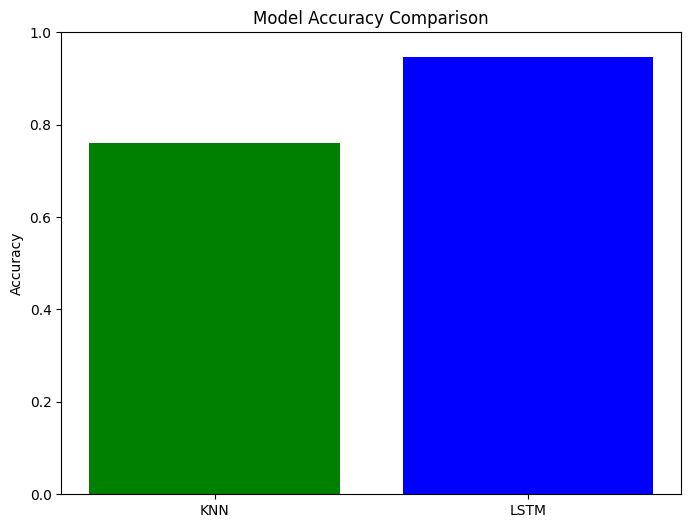

In [10]:
import matplotlib.pyplot as plt

models = ['KNN', 'LSTM']
accuracies = [knn_accuracy, lstm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()